In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

# Upload data

Here is a summary of the dataset in points:

- <font color = "cyan"> Dataset Overview </font>
  - Contains temperature data for **35 European cities**.
  - Cities are divided into:
    - **Capitals**: Rows 1 to 24 (e.g., Amsterdam to Stockholm).
    - **Major cities (non-capitals)**: Rows 25 to 35 (e.g., Antwerp to Zurich).

- <font color = "cyan"> Variables </font>
  - **Quantitative**: 15 variables.
    - Indexed from 1 (January) to 12 (December) for monthly temperatures.
    - Variables 13 (Average Temperature) to 16 (Longitude) are supplementary.
  - **Qualitative**: 1 variable (`Région`), indicating the geographic location of the city.

- <font color = "cyan"> Scope of the Exercise </font>:
  - Focuses only on **European capitals** (23 rows).
  - Analyzes variables **1 to 12** (monthly temperatures).

- <font color = "cyan">Filtered Dataset this Study </font>
  - Rows: **23** (European capitals only).
  - Columns: **12** (Monthly temperatures).

In [21]:
# data_path = "/content/drive/MyDrive/e-business & Big Data/Machine Learning/Mini Project/data/temperature.xlsx"

data_path = "temperature.xlsx"

# Import data
data = pd.read_excel(data_path)[:23]
data

,Ville,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est
5,Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,Nord
6,Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,Nord
7,Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord
8,Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est
9,Cracovie,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6,Est


# Part 1: Principal Component Analysis (PCA)

## Question 1

It is necessary to center and scale the data before applying PCA.

Centering ensures that PCA captures variance relative to the true spread of the data rather than the offset caused by the mean.

Scaling ensures that all variables contribute equally to the analysis. It makes all the data have the same "weight" within the PCA.

## Question 2

In [22]:
X = data.values[:,1:-5]
X

array([[2.9, 2.5, 5.7, 8.2, 12.5, 14.8, 17.1, 17.1, 14.5, 11.4, 7.0, 4.4],
       [9.1, 9.7, 11.7, 15.4, 20.1, 24.5, 27.4, 27.2, 23.8, 19.2, 14.6,
        11.0],
       [-0.2, 0.1, 4.4, 8.2, 13.8, 16.0, 18.3, 18.0, 14.4, 10.0, 4.2,
        1.2],
       [3.3, 3.3, 6.7, 8.9, 12.8, 15.6, 17.8, 17.8, 15.0, 11.1, 6.7, 4.4],
       [-1.1, 0.8, 5.5, 11.6, 17.0, 20.2, 22.0, 21.3, 16.9, 11.3, 5.1,
        0.7],
       [-0.4, -0.4, 1.3, 5.8, 11.1, 15.4, 17.1, 16.6, 13.3, 8.8, 4.1,
        1.3],
       [4.8, 5.0, 5.9, 7.8, 10.4, 13.3, 15.0, 14.6, 12.7, 9.7, 6.7, 5.4],
       [-5.8, -6.2, -2.7, 3.1, 10.2, 14.0, 17.2, 14.9, 9.7, 5.2, 0.1,
        -2.3],
       [-5.9, -5.0, -0.3, 7.4, 14.3, 17.8, 19.4, 18.5, 13.7, 7.5, 1.2,
        -3.6],
       [-3.7, -2.0, 1.9, 7.9, 13.2, 16.9, 18.4, 17.6, 13.7, 8.6, 2.6,
        -1.7],
       [10.5, 11.3, 12.8, 14.5, 16.7, 19.4, 21.5, 21.9, 20.4, 17.4, 13.7,
        11.1],
       [3.4, 4.2, 5.5, 8.3, 11.9, 15.1, 16.9, 16.5, 14.0, 10.2, 6.3, 4.4],
       [5.0, 6.6

In [23]:
# Import
from sklearn.preprocessing import StandardScaler

In [24]:
# Centering and Standardizing Data
Z = StandardScaler().fit_transform(X)
print(Z)

[[ 0.53806681  0.30819317  0.37313567 -0.05250287 -0.26156905 -0.64016627
  -0.54856845 -0.3415513  -0.05668321  0.34492335  0.464655    0.56621864]
 [ 1.76180409  1.74584917  1.73899037  2.06810076  2.30709784  2.51959245
   2.54561884  2.52279408  2.46926215  2.3605341   2.30224988  2.02798718]
 [-0.07380183 -0.1710255   0.07720048 -0.05250287  0.17780818 -0.24926828
  -0.18808061 -0.0863126  -0.08384391 -0.01685293 -0.21235364 -0.14251762]
 [ 0.6170176   0.46793272  0.60077812  0.15366693 -0.16017431 -0.37956761
  -0.33828388 -0.14303231  0.07912031  0.26739986  0.39211836  0.56621864]
 [-0.25144111 -0.03125339  0.32760718  0.94889329  1.25935213  1.11887467
   0.92342356  0.84956262  0.59517366  0.31908219  0.00525628 -0.25325766]
 [-0.11327722 -0.27086273 -0.62849111 -0.75937074 -0.73474454 -0.44471727
  -0.54856845 -0.48335058 -0.38261164 -0.32694689 -0.23653252 -0.12036961]
 [ 0.91308307  0.80737928  0.41866416 -0.17031418 -0.97133228 -1.12878875
  -1.17942217 -1.05054768 -0.545

In [25]:
# Import
from sklearn.decomposition import PCA

In [26]:
# Instanciation of PCA
pca = PCA()
# The PCA is performed, and the factor scores are retrieved in the matrix 'coord'.
coord = pca.fit_transform(Z)
print(coord)
# Number of principal components
n = (pca.n_components_)
print(n)

[[ 0.22693852  1.3713787  -0.10439354 -0.28279276  0.22523498  0.06201465
   0.01414893 -0.03631268  0.00128671  0.02814351 -0.03185478  0.00634351]
 [ 7.60067204 -0.93037574  0.56142895 -0.28655724 -0.12128409 -0.02196803
  -0.00969001 -0.03548009  0.02217694  0.02691355  0.01873142 -0.00153044]
 [-0.28785832 -0.01645407 -0.29060835 -0.05559305  0.14177744  0.18244939
   0.15978487 -0.01983456  0.04083765 -0.02455248 -0.02110587  0.00069986]
 [ 0.63117358  1.17721764 -0.15204276  0.01706987  0.1180803   0.0974073
   0.04533831  0.01570909 -0.03239746  0.07128543  0.03816861  0.00359662]
 [ 1.66802839 -1.71269773 -0.49898331  0.11243655 -0.1474938   0.06166089
   0.00351093  0.02829412 -0.00585999  0.00509691 -0.01497985  0.02280278]
 [-1.46239513  0.49205631  0.44036858 -0.17671615 -0.0013598  -0.18884831
   0.10157357  0.00938437 -0.00446928 -0.0263817   0.02282617  0.02375004]
 [-0.50524137  2.67349692 -0.17850939  0.02991118 -0.19948911 -0.0096132
  -0.06304325  0.03256596 -0.04927

## Question 3

The variance of each component represent the amount of variability in the original dataset that is represented by that specific component.

The total variance explained by all the components is 100%. It is the variance of our dataset.

In [27]:
# Retrieve the eigenvalues / variance / inertia.
# The variance is estimated with n-1 degrees of freedom.
variance = pca.explained_variance_

# An adjustment is necessary to obtain the variance with n degrees of freedom.
eigval = variance*(len(Z)-1)/len(Z)

print(np.sum(eigval,axis=0))

# Eigenvalue representation ratio or the percentage of inertia explained by each axis
np.set_printoptions(suppress=True)
print(pca.explained_variance_ratio_*100)

11.99999999999999
[82.89792017 15.39707085  1.0521317   0.31911205  0.13924507  0.10694196
  0.04858578  0.01693244  0.00852876  0.00793976  0.00447319  0.00111826]


## Question 4

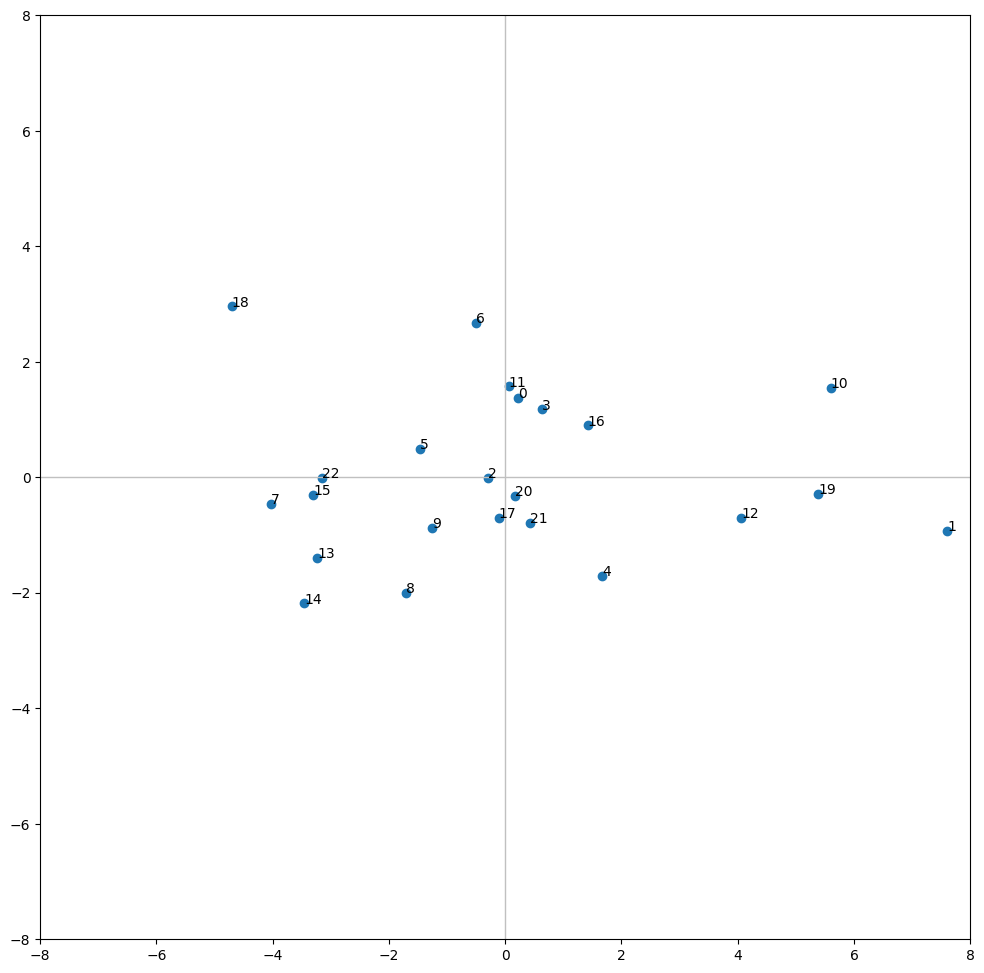

In [28]:
# Creation of the graph
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)

# Placement of the points
plt.scatter(coord[:,0],coord[:,1])

# Placement of the observation labels
for i in range(len(Z)):
     plt.annotate(data.index[i],(coord[i,0],coord[i,1]))

# Addition of axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)

# Display
plt.show()

It seems that data are far more correlated with the first variable than with the second.

# Part 2: K-Means Clustering

## Question 1

- The elbow method measures inertia (sum of intra-cluster distances). The inertia is plotted as a function of K and the ‘elbow’ is sought, where the decrease becomes marginal.
- The silhouette criterion evaluates the quality of the clusters via a score (between -1 and 1) based on internal cohesion and separation between clusters. The best value of K maximises this score.

The elbow method is simple and visual, but can be subjective. The silhouette criterion is more precise and considers cluster separation. The two are often combined to validate K.

## Question 2

In [29]:
# Création d'un DataFrame pour les deux premières variables
df = pd.DataFrame(coord[:, :2], columns=['PC1', 'PC2'])
df

,PC1,PC2
0,0.226939,1.371379
1,7.600672,-0.930376
2,-0.287858,-0.016454
3,0.631174,1.177218
4,1.668028,-1.712698
5,-1.462395,0.492056
6,-0.505241,2.673497
7,-4.036297,-0.462039
8,-1.712220,-2.007598
9,-1.258657,-0.874989


In [31]:
# Import
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhouette score for 2 clusters: 0.5601284047248769
Silhouette score for 3 clusters: 0.4709009347738369
Silhouette score for 4 clusters: 0.46599245589975347
Silhouette score for 5 clusters: 0.43646582303398596
Silhouette score for 6 clusters: 0.37203866174189143
Silhouette score for 7 clusters: 0.3621853192807475
Silhouette score for 8 clusters: 0.3589598763290538
Silhouette score for 9 clusters: 0.33727186405024945


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

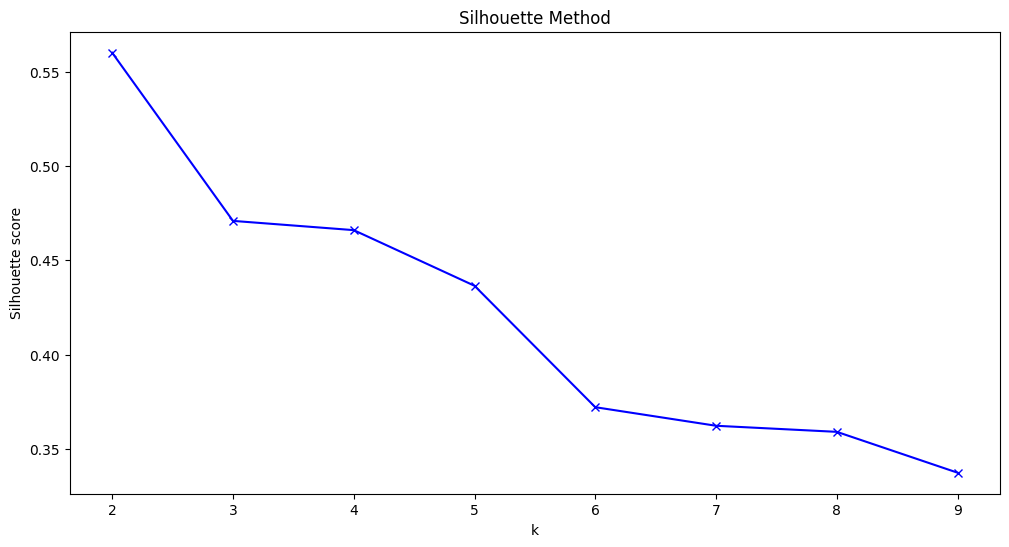

In [32]:
# Silhouette method
silhouette = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette.append(score)
    print(f"Silhouette score for {k} clusters: {score}")

# Graph of the silhouette method
plt.figure(figsize=(12, 6))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()